In [ ]:
#default_exp core.datasets.moving_mnist

In [ ]:
#export
import os
import numpy as np
import torch
from torchvision.datasets import MNIST, FashionMNIST
from torchvision.transforms import ToTensor
from PIL import Image

from vase.config import DATA_PATH

# Moving MNIST
> Here we define varients of MNIST and Fashion MNIST with the location of the objects varied

## Common MNIST/FashionMNIST
The pytorch version of MNIST stored data according to the class name - so to allow for classes to inheret from MNIST without downloading the same dataset to multiple directories, we'll override the the original pytorch MNIST as follows: 

In [ ]:
#export 
class CommonMNIST(MNIST):
    """MNIST where data path is fixed"""
    
    FOLDER_NAME = "MNIST"

    @property
    def raw_folder(self) -> str:
        return os.path.join(self.root, self.FOLDER_NAME, 'raw')

    @property
    def processed_folder(self) -> str:
        return os.path.join(self.root, self.FOLDER_NAME, 'processed')

In [ ]:
#export
class CommonFashionMNIST(FashionMNIST):
    """FashionMNIST where data path is fixed"""

    FOLDER_NAME = "FashionMNIST"

    @property
    def raw_folder(self) -> str:
        return os.path.join(self.root, self.FOLDER_NAME, 'raw')

    @property
    def processed_folder(self) -> str:
        return os.path.join(self.root, self.FOLDER_NAME, 'processed')

## Explore MNIST and Fashion MNIST

In [ ]:
mnist = CommonMNIST(DATA_PATH, download=True)
mnist[0][0]

In [ ]:
mnist = CommonMNIST(DATA_PATH, download=True, transform=ToTensor())
mnist[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
fashion_mnist = FashionMNIST(DATA_PATH, download=True)
fashion_mnist[0][0]

In [ ]:
fashion_mnist = FashionMNIST(DATA_PATH, download=True, transform=ToTensor())
fashion_mnist[0][0].shape

torch.Size([1, 28, 28])

## Moving MNSIT/Fashion MNIST

The original [moving MNIST](http://www.cs.toronto.edu/~nitish/unsupervised_video/) uses a 64x64 background, which Aachilles et al also seems to use:

`For the encoder we use a simple convolutional network with the following structure:
conv 64 → ...`

Since the MNIST and FashionMNIST are 28x28, that leaves a 36x36 possible locations for each image

To generate the "Moving" datasets, the location of each image will be randomly sampled and stitched onto a black background each time `__getitem__` is called

### Exploration

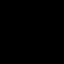

In [ ]:
dst = Image.new('L', (64, 64))
dst

In [ ]:
fashion_mnist = FashionMNIST(DATA_PATH, download=True)
img = fashion_mnist[0][0]
img

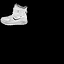

In [ ]:
dst.paste(img, [0,0])
dst

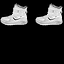

In [ ]:
dst.paste(img, [35, 0])
dst

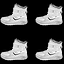

In [ ]:
dst.paste(img, [0, 35])
dst.paste(img, [35, 35])
dst

In [ ]:
pos = torch.randint(0, 36, (2,))
pos

tensor([19, 27])

In [ ]:
pos.numpy().tolist()

[19, 27]

### Moving MNIST

In [ ]:
#export
class MovingMNIST(CommonMNIST):
    """Moving MNIST, with MNIST digits randomly projected onto 64x64 black background"""

    def __getitem__(self, index):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target, location) where target is index of the target class, location is the (x,y) coordinate of the top left corner
        """
        img, target = self.data[index], int(self.targets[index])


        #sample x, y location in 36x36 grid
        pos = torch.randint(0, 36, (2,))
        
        #paste image 
        background = Image.new('L', (64, 64))
        img = Image.fromarray(img.numpy(), mode="L")
        background.paste(img, pos.numpy().tolist())
        img = background

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target, pos

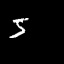

In [ ]:
moving_mnist = MovingMNIST(DATA_PATH)
img, target, pos = moving_mnist[0]
img

In [ ]:
target, pos

(5, tensor([ 5, 13]))

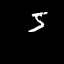

In [ ]:
img, target, pos = moving_mnist[0]
img

In [ ]:
target, pos

(5, tensor([24,  7]))

### Moving FashionMNIST

In [ ]:
#export
class MovingFashionMNIST(CommonFashionMNIST):
    """Moving MNIST, with MNIST digits randomly projected onto 64x64 black background"""

    def __getitem__(self, index):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target, location) where target is index of the target class, location is the (x,y) coordinate of the top left corner
        """
        img, target = self.data[index], int(self.targets[index])


        #sample x, y location in 36x36 grid
        pos = torch.randint(0, 36, (2,))
        
        #paste image 
        background = Image.new('L', (64, 64))
        img = Image.fromarray(img.numpy(), mode="L")
        background.paste(img, pos.numpy().tolist())
        img = background

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target, pos

In [ ]:
moving_fasionmnist = MovingFashionMNIST(DATA_PATH)

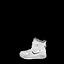

In [ ]:
img, target, pos = moving_fasionmnist[0]
img

In [ ]:
target, pos

(9, tensor([19, 34]))

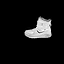

In [ ]:
img, target, pos = moving_fasionmnist[0]
img

In [ ]:
target, pos

(9, tensor([24, 13]))

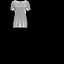

In [ ]:
img, target, pos = moving_fasionmnist[10]
img